In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['chartreuse','mediumseagreen','mediumaquamarine','mediumturquoise','cadetblue','skyblue','teal',
                                        'mediumspringgreen','seagreen']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [3]:
playas=pd.read_csv('Monitoreo de Playas 2018')
playas.tail()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
723,2018-08-27,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,85,29.9,8.21,NaN
724,2018-08-28,RW-38,Muelle de Arecibo,18.479258,-66.700467,Route: 6: Arecibo – Vega Alta,Routine,10,28.9,8.08,NaN
725,2018-08-28,RW-39,Mar Chiquita,18.472917,-66.485656,Route: 6: Arecibo – Vega Alta,Routine,10,29.0,8.22,NaN
726,2018-08-28,RW-23,Balneario de Puerto Nuevo,18.491367,-66.399044,Route: 6: Arecibo – Vega Alta,Routine,10,28.9,8.23,NaN
727,2018-08-28,RW-17,Balneario Cerro Gordo or Javier Calderón Nieves,18.481250,-66.340656,Route: 6: Arecibo – Vega Alta,Routine,10,28.8,8.21,NaN


In [4]:
playas2=pd.read_csv("Monitoreo 2016 y 2017.csv")
playas2.tail()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
894,2017-08-28,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,238,30.1,8.14/8.15,Preliminar
895,2017-08-29,RW-38,Muelle de Arecibo,18.479258,-66.700467,Route: 6: Arecibo – Vega Alta,Routine,272,29,8.13,Preliminar
896,2017-08-29,RW-39,Mar Chiquita,18.472917,-66.485656,Route: 6: Arecibo – Vega Alta,Routine,10,29,8.21,Preliminar
897,2017-08-29,RW-23,Balneario de Puerto Nuevo,18.491367,-66.399044,Route: 6: Arecibo – Vega Alta,Routine,20,29.3,8.19,Preliminar
898,2017-08-29,RW-17,Balneario Cerro Gordo or Javier Calderón Nieves,18.481250,-66.340656,Route: 6: Arecibo – Vega Alta,Routine,10,29.5,8.21/8.20,Preliminar


In [5]:
playas3=pd.read_csv("Monitoreo 2015 y 2016.csv")
playas3.tail()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
1133,2016-09-27,RW-4,Balneario Punta Santiago,18.158414,-65.755186,Route 2: Arroyo - Luquillo,Routine,10,30.60,8.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1134,2016-09-27,RW-31,Tropical Beach,18.186928,-65.725967,Route 2: Arroyo - Luquillo,Routine,116,31.20,8.15/8.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135,2016-09-27,RW-2,Balneario Seven Seas,18.369267,-65.636072,Route 2: Arroyo - Luquillo,Routine,10,31.40,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,2016-09-27,RW-32,Playa Azul,18.381867,-65.718458,Route 2: Arroyo - Luquillo,Routine,10,29.70,8.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,2016-09-27,RW-1A,Balneario La Monserrate,18.385592,-65.729472,Route 2: Arroyo - Luquillo,Routine,10,29.70,8.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
playas3=playas3.drop(columns=['Observations','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15',
                      'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19'])

In [7]:
playas3.head()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH
0,2015-04-06,RW-24A,Balneario Sun Bay,18.096303,-65.465422,Vieques,Routine,1,26.80,Data Not Reported
1,2015-04-06,RW-24B,Balneario Sun Bay,18.096722,-65.458944,Vieques,Routine,10,26.90,Data Not Reported
2,2015-04-07,RW-38,Muelle de Arecibo,18.479258,-66.700467,Route: 6: Arecibo – Vega Alta,Routine,373,25.50,7.9
3,2015-04-07,RW-39,Mar Chiquita,18.472917,-66.485656,Route: 6: Arecibo – Vega Alta,Routine,1,28.50,8.11
4,2015-04-07,RW-23,Balneario de Puerto Nuevo,18.491367,-66.399044,Route: 6: Arecibo – Vega Alta,Routine,1,27.90,8.24


In [8]:
playasdePuertoRico=pd.concat([playas2,playas],sort=False, ignore_index=True)
playasdePuertoRico.tail()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
1622,2018-08-27,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,85,29.9,8.21,NaN
1623,2018-08-28,RW-38,Muelle de Arecibo,18.479258,-66.700467,Route: 6: Arecibo – Vega Alta,Routine,10,28.9,8.08,NaN
1624,2018-08-28,RW-39,Mar Chiquita,18.472917,-66.485656,Route: 6: Arecibo – Vega Alta,Routine,10,29.0,8.22,NaN
1625,2018-08-28,RW-23,Balneario de Puerto Nuevo,18.491367,-66.399044,Route: 6: Arecibo – Vega Alta,Routine,10,28.9,8.23,NaN
1626,2018-08-28,RW-17,Balneario Cerro Gordo or Javier Calderón Nieves,18.481250,-66.340656,Route: 6: Arecibo – Vega Alta,Routine,10,28.8,8.21,NaN


In [9]:
Total_playasdePuertoRico=pd.concat([playas3,playasdePuertoRico],sort=False, ignore_index=True)
Total_playasdePuertoRico.head()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
0,2015-04-06,RW-24A,Balneario Sun Bay,18.096303,-65.465422,Vieques,Routine,1,26.80,Data Not Reported,NaN
1,2015-04-06,RW-24B,Balneario Sun Bay,18.096722,-65.458944,Vieques,Routine,10,26.90,Data Not Reported,NaN
2,2015-04-07,RW-38,Muelle de Arecibo,18.479258,-66.700467,Route: 6: Arecibo – Vega Alta,Routine,373,25.50,7.9,NaN
3,2015-04-07,RW-39,Mar Chiquita,18.472917,-66.485656,Route: 6: Arecibo – Vega Alta,Routine,1,28.50,8.11,NaN
4,2015-04-07,RW-23,Balneario de Puerto Nuevo,18.491367,-66.399044,Route: 6: Arecibo – Vega Alta,Routine,1,27.90,8.24,NaN


In [10]:
Total_playasdePuertoRico.columns

Index(['Date', 'Beach ID', 'Beach Name', 'Latitude', 'Longitude',
       'Sampling Route', 'Sampling Type', 'Enterococcus\r\n (colonies/100 mL)',
       'Temperature\r\n(°C)', 'pH ', 'Observations'],
      dtype='object')

In [11]:
Total_playasdePuertoRico['Beach Name'].value_counts()

Tropical Beach                                     112
Muelle de Arecibo                                   99
Playa Guayanés                                      93
Balneario de Patillas                               90
Balneario Punta Guilarte                            84
Pico de Piedra                                      83
Balneario de Rincón                                 82
Balneario de Añasco or Balneario Tres Hermanos      80
Playa Moja Casabe                                   80
Balneario Punta Santiago                            80
Playa Buyé                                          79
Balneario Seven Seas                                78
Balneario de Puerto Nuevo                           77
Villa Lamela                                        76
Balneario Crash Boat                                76
Playa Santa                                         75
Playita Rosada                                      75
Vacía Talega                                        75
Balneario 

In [12]:
import re

In [13]:
Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)']=Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'].fillna(0)

In [14]:
Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)']=Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'].str.extract(r'<?(.*)')

In [15]:
Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'].describe()

count     2764
unique     262
top         10
freq      1239
Name: Enterococcus\r\n (colonies/100 mL), dtype: object

In [16]:
Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)']=pd.to_numeric(Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'], errors='coerce')

In [52]:
Total_playasdePuertoRico= Total_playasdePuertoRico[Total_playasdePuertoRico['Enterococcus\r\n (colonies/100 mL)'] > 70]
Total_playasdePuertoRico.shape

(506, 11)

In [53]:
Total_playasdePuertoRico['Date']=pd.to_datetime(Total_playasdePuertoRico['Date'],format='%Y-%m-%d')

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
Total_playasdePuertoRico['Year'] = Total_playasdePuertoRico['Date'].dt.year
Total_playasdePuertoRico['Month'] = Total_playasdePuertoRico['Date'].dt.month

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


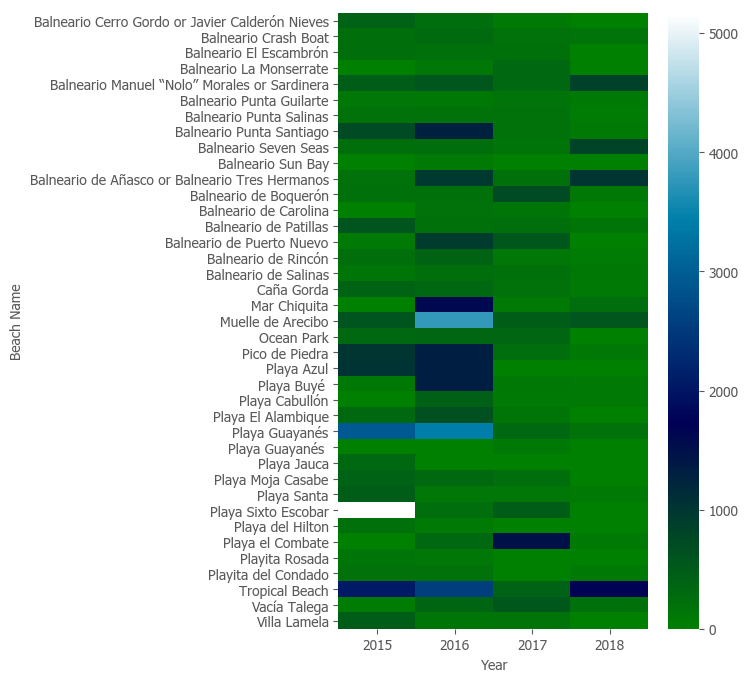

In [63]:
#Contaminación en comparación con otras playas
final = Total_playasdePuertoRico.pivot_table(index="Beach Name",columns="Year",values="Enterococcus\r\n (colonies/100 mL)", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'ocean'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(final, annot=None, cmap=cmaps)
#plt.tight_layout()
plt.savefig('Contaminación en comparación con otras playas.pdf', transparent=True)
plt.show()

In [17]:
Oeste = Total_playasdePuertoRico[Total_playasdePuertoRico['Beach Name'].isin(['Playa Moja Casabe','Pico de Piedra','Balneario de Añasco or Balneario Tres Hermanos', 'Playa el Combate',
'Balneario de Rincón',
'Playa Buyé', 'Balneario de Boquerón', 
'Balneario Crash Boat', 'Balneario Crash Boat','Playita Rosada',
'Villa Lamela', 'Playa Santa', 'Caña Gorda',  ' Villa Lamela'])] 
Oeste.head()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
23,2015-04-06,RW-37,Villa Lamela,18.064533,-67.197528,Route 4: Cabo Rojo,Routine,1.0,28.30,8.1,NaN
25,2015-04-06,RW-13,Balneario de Boquerón,18.019442,-67.172244,Route 4: Cabo Rojo,Routine,1.0,28.00,8.17,NaN
26,2015-04-06,RW-14A,Playa Moja Casabe,17.985810,-67.214590,Route 4: Cabo Rojo,Routine,10.0,26.90,8.23,NaN
27,2015-04-06,RW-12B,Playa el Combate,17.974794,-67.212906,Route 4: Cabo Rojo,Routine,10.0,26.00,8.20/8.20,NaN
28,2015-04-06,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.287997,-67.193922,Route 5: Añasco - Aguadilla,Routine,20.0,27.50,8.07/8.07,NaN


In [18]:
Oeste.tail()

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
2756,2018-08-27,RW-12B,Playa el Combate,17.974794,-67.212906,Route 4: Cabo Rojo,Routine,10.0,30.2,8.29,NaN
2757,2018-08-27,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.287997,-67.193922,Route 5: Añasco - Aguadilla,Routine,10.0,29.6,8.16,NaN
2758,2018-08-27,RW-5,Balneario de Rincón,18.340925,-67.256006,Route 5: Añasco - Aguadilla,Routine,31.0,29.5,8.19,NaN
2759,2018-08-27,RW-22,Pico de Piedra,18.384364,-67.212989,Route 5: Añasco - Aguadilla,Routine,109.0,29.8,8.21,NaN
2760,2018-08-27,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,85.0,29.9,8.21,NaN


In [19]:
#Playas del oeste de Puerto Rico 
Oeste_sucio = Oeste[Oeste['Enterococcus\r\n (colonies/100 mL)'] > 70]
Oeste_sucio.shape

(124, 11)

In [20]:
Oeste_sucio['Date']=pd.to_datetime(Oeste_sucio['Date'],format='%Y-%m-%d')

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
Oeste_sucio['Year'] = Oeste_sucio['Date'].dt.year
Oeste_sucio['Month'] = Oeste_sucio['Date'].dt.month

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
Oeste_sucio=Oeste_sucio.rename(columns={'Enterococcus\r\n (colonies/100 mL)':'Enterococcus_colonies'})

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


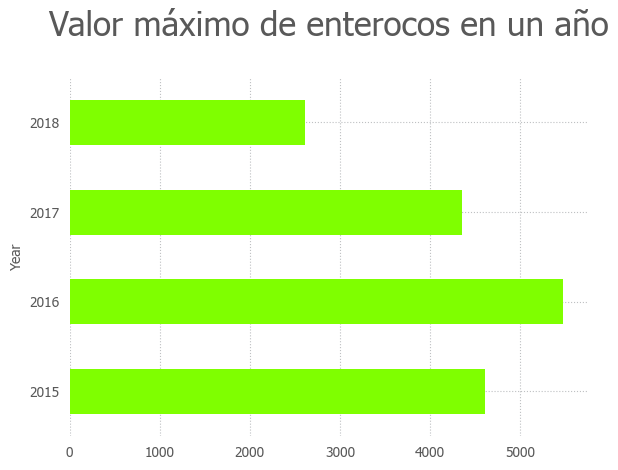

In [28]:
colors= ['chartreuse']
data= Oeste_sucio.groupby('Year').Enterococcus_colonies.max(ascending=True)
ax = data.plot(kind='barh',x='Enterococcus_colonies',y='Year',colors=colors)
ax.set_title("Valor máximo de enterocos en un año", pad=30, fontsize=24)
plt.tight_layout()
plt.savefig('Valor máximo de enterocos en un año.pdf',transparent=True)
plt.show()

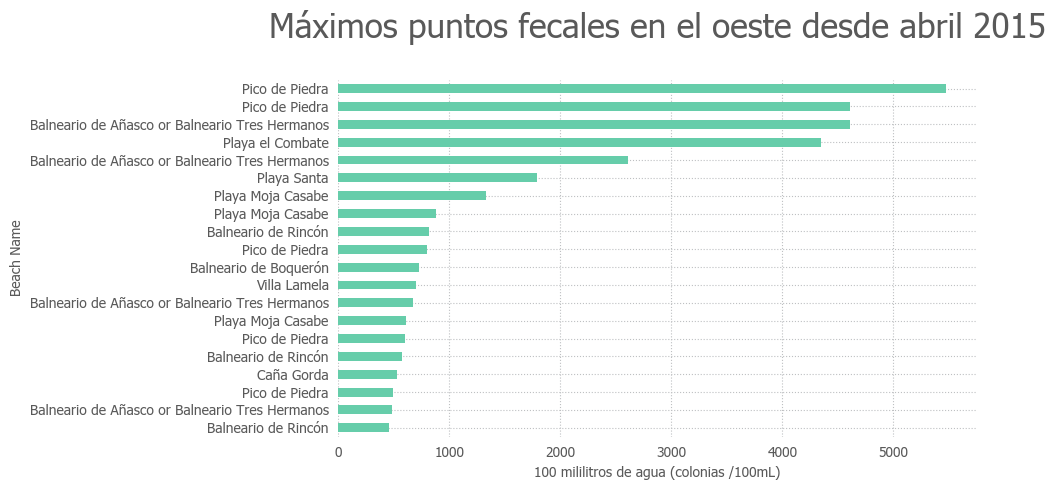

In [29]:
df1= Oeste_sucio.sort_values(by='Enterococcus_colonies',ascending=False).head(20)
ax= df1.plot(kind='barh', x='Beach Name', y='Enterococcus_colonies', figsize=(10,5),legend=False,rot=0,color='mediumaquamarine')
ax.set_title("Máximos puntos fecales en el oeste desde abril 2015", pad=30, fontsize=24)
ax.set_xlabel('100 mililitros de agua (colonias /100mL)')
#plt.gcf().text(0.5, 0.91, "Bacteria samples exceeding Puerto Rico's Environmental Quality Board parameters", ha='center', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Máximos puntos fecales en el oeste desde abril 2015.pdf',transparent=True)
plt.show()

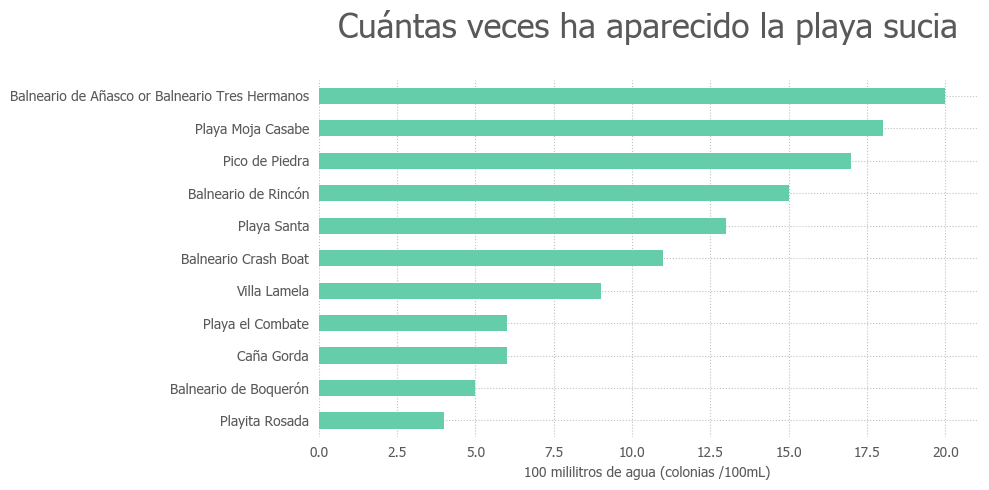

In [30]:
df1= Oeste_sucio['Beach Name'].value_counts()
ax= df1.plot(kind='barh', x='Beach Name', y='Enterococcus_colonies', figsize=(10,5),legend=False,rot=0,color='mediumaquamarine')
ax.set_title("Cuántas veces ha aparecido la playa sucia", pad=30, fontsize=24)
ax.set_xlabel('100 mililitros de agua (colonias /100mL)')
#plt.gcf().text(0.5, 0.91, "Bacteria samples exceeding Puerto Rico's Environmental Quality Board parameters", ha='center', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Cuántas veces ha aparecido la playa sucia',transparent=True)
plt.show()

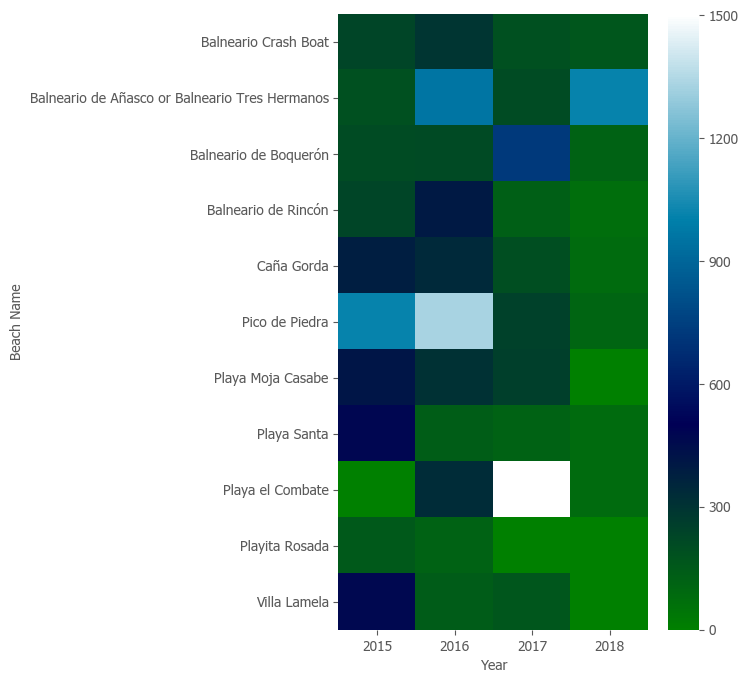

In [31]:
final = Oeste_sucio.pivot_table(index="Beach Name",columns="Year",values="Enterococcus_colonies", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'ocean'
ax.set_title("Niveles de contaminación desde abril 2015", pad=30, fontsize=24)
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(final, annot=None, cmap=cmaps)
#plt.tight_layout()

plt.savefig('Dirty_beaches_in-westside_Puerto_Rico.pdf', transparent=True)
plt.show()

In [32]:
Oeste_2018= Oeste_sucio[Oeste_sucio['Year']==2018]
Oeste_2018

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus_colonies,Temperature (°C),pH,Observations,Year,Month
2177,2018-01-08,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.287997,-67.193922,Route 5: Añasco - Aguadilla,Routine,85.0,27.2,8.12,NaN,2018,1
2180,2018-01-08,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,250.0,27.5,8.20/8.20,NaN,2018,1
2187,2018-01-17,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.287997,-67.193922,Route 5: Añasco - Aguadilla,RE-sampling,2613.0,25,RE-sampling,NaN,2018,1
2444,2018-04-30,RW-13,Balneario de Boquerón,18.019442,-67.172244,Route 4: Cabo Rojo,Routine,120.0,28.4,8.14,NaN,2018,4
2485,2018-05-14,RW-12B,Playa el Combate,17.974794,-67.212906,Route 4: Cabo Rojo,Routine,86.0,28.3,8.24/8.24,NaN,2018,5
2564,2018-06-11,RW-5,Balneario de Rincón,18.340925,-67.256006,Route 5: Añasco - Aguadilla,Routine,74.0,27.9,8.08,NaN,2018,6
2593,2018-06-25,RW-10,Playa Santa,NaN,NaN,NaN,NaN,85.0,28.4,6.89,NaN,2018,6
2594,2018-06-25,RW-9,Caña Gorda,NaN,NaN,NaN,NaN,86.0,29,6.79,NaN,2018,6
2611,2018-07-02,RW-9,Caña Gorda,NaN,NaN,NaN,NaN,84.0,28,Re-sampling,NaN,2018,7
2676,2018-07-30,RW-12B,Playa el Combate,17.974794,-67.212906,Route 4: Cabo Rojo,Routine,84.0,29.1,8.27,NaN,2018,7


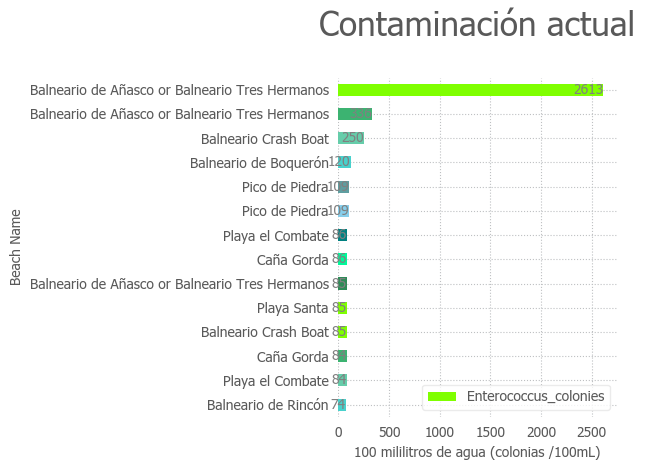

In [38]:
df=Oeste_2018.sort_values(by='Enterococcus_colonies',ascending=False).head(20)
ax=df.plot(kind='barh', x='Beach Name', y='Enterococcus_colonies')
ax.set_title('Contaminación actual', pad=30, fontsize=24)
ax.set_xlabel('100 mililitros de agua (colonias /100mL)')
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='grey')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Contaminación reciente.pdf',transparent=True)
plt.show()

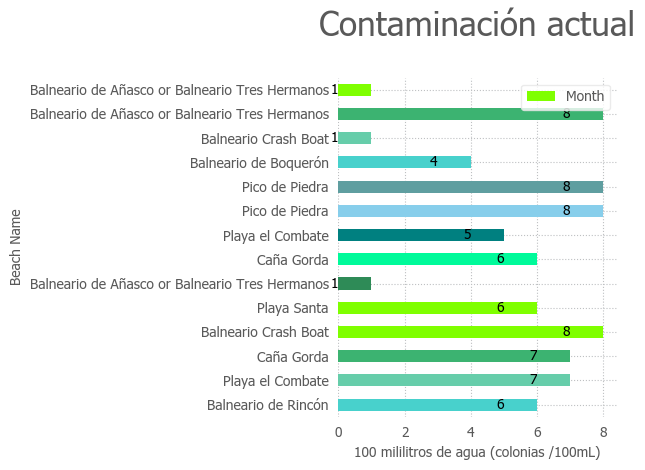

In [35]:
df=Oeste_2018.sort_values(by='Enterococcus_colonies',ascending=False).head(20)
ax=df.plot(kind='barh', x='Beach Name', y='Month')
ax.set_title('Contaminación actual', pad=30, fontsize=24)
ax.set_xlabel('100 mililitros de agua (colonias /100mL)')
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='black')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.savefig('Contaminación reciente por mes.pdf',transparent=True)
plt.show()

In [39]:
Oeste_limpio = Oeste[Oeste['Enterococcus\r\n (colonies/100 mL)'] < 70] 
Oeste_limpio

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations
23,2015-04-06,RW-37,Villa Lamela,18.064533,-67.197528,Route 4: Cabo Rojo,Routine,1.0,28.30,8.1,NaN
25,2015-04-06,RW-13,Balneario de Boquerón,18.019442,-67.172244,Route 4: Cabo Rojo,Routine,1.0,28.00,8.17,NaN
26,2015-04-06,RW-14A,Playa Moja Casabe,17.985810,-67.214590,Route 4: Cabo Rojo,Routine,10.0,26.90,8.23,NaN
27,2015-04-06,RW-12B,Playa el Combate,17.974794,-67.212906,Route 4: Cabo Rojo,Routine,10.0,26.00,8.20/8.20,NaN
28,2015-04-06,RW-15,Balneario de Añasco or Balneario Tres Hermanos,18.287997,-67.193922,Route 5: Añasco - Aguadilla,Routine,20.0,27.50,8.07/8.07,NaN
29,2015-04-06,RW-5,Balneario de Rincón,18.340925,-67.256006,Route 5: Añasco - Aguadilla,Routine,1.0,27.20,8.04,NaN
31,2015-04-06,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,Routine,1.0,26.30,8.08,NaN
33,2015-04-06,RW-10,Playa Santa,17.937711,-66.955197,Route 3: Lajas - Salinas,Routine,10.0,26.00,8.14,NaN
34,2015-04-06,RW-9,Caña Gorda,17.952531,-66.884561,Route 3: Lajas - Salinas,Routine,10.0,26.10,8.02,NaN
38,2015-04-13,RW-33,Playita Rosada,17.971717,-66.031500,Route 3: Lajas - Salinas,Re-sampling,20.0,27.00,Bacteriological Re-sampling,NaN


In [40]:
Oeste_limpio['Date']=pd.to_datetime(Oeste_limpio['Date'],format='%Y-%m-%d')

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
Oeste_limpio['Year'] = Oeste_limpio['Date'].dt.year
Oeste_limpio['Month'] = Oeste_limpio['Date'].dt.month

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
Oeste_limpio_2018= Oeste_limpio[Oeste_limpio['Year']==2018]
Oeste_limpio_2018

,Date,Beach ID,Beach Name,Latitude,Longitude,Sampling Route,Sampling Type,Enterococcus (colonies/100 mL),Temperature (°C),pH,Observations,Year,Month
2167,2018-01-08,RW-33,Playita Rosada,17.971717,-66.031500,Route 3: Lajas - Salinas,Routine,10.0,26.2,7.94,NaN,2018,1
2168,2018-01-08,RW-10,Playa Santa,17.937711,-66.955197,Route 3: Lajas - Salinas,Routine,10.0,26.1,8.06,NaN,2018,1
2169,2018-01-08,RW-9,Caña Gorda,17.952531,-66.884561,Route 3: Lajas - Salinas,Routine,10.0,26.8,8.06,NaN,2018,1
2172,2018-01-09,RW-37,Villa Lamela,18.064533,-67.197528,Route 4: Cabo Rojo,Routine,10.0,26.8,8.13,NaN,2018,1
2174,2018-01-09,RW-13,Balneario de Boquerón,18.019442,-67.172244,Route 4: Cabo Rojo,Routine,10.0,27.3,8.04,NaN,2018,1
2175,2018-01-09,RW-14A,Playa Moja Casabe,17.985810,-67.214590,Route 4: Cabo Rojo,Routine,52.0,26.7,7.94,NaN,2018,1
2176,2018-01-09,RW-12B,Playa el Combate,17.974794,-67.212906,Route 4: Cabo Rojo,Routine,31.0,27,7.94/7.93,NaN,2018,1
2178,2018-01-08,RW-5,Balneario de Rincón,18.340925,-67.256006,Route 5: Añasco - Aguadilla,Routine,20.0,27.8,8.25,NaN,2018,1
2179,2018-01-08,RW-22,Pico de Piedra,18.384364,-67.212989,Route 5: Añasco - Aguadilla,Routine,31.0,27.5,8.15,NaN,2018,1
2188,2018-01-17,RW-16,Balneario Crash Boat,18.457667,-67.163778,Route 5: Añasco - Aguadilla,RE-sampling,20.0,25,RE-sampling,NaN,2018,1


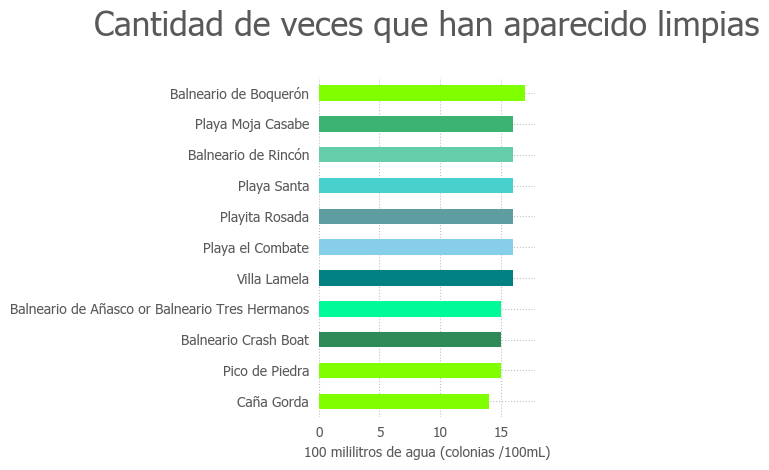

In [45]:
df2=Oeste_limpio_2018['Beach Name'].value_counts()
ax=df2.plot(kind='barh', x='Beach Name', y='Enterococcus_colonies')
ax.set_title('Cantidad de veces que han aparecido limpias', pad=30, fontsize=24)
ax.set_xlabel('100 mililitros de agua (colonias /100mL)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Limpias.pdf',transparent=True)
plt.show()

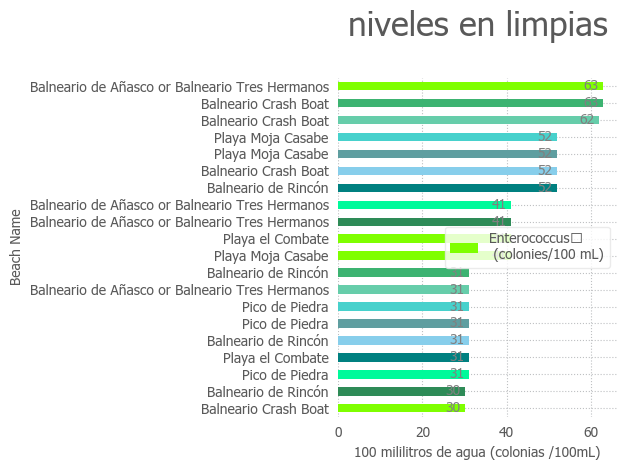

In [49]:
df5=Oeste_limpio_2018.sort_values(by='Enterococcus\r\n (colonies/100 mL)',ascending=False).head(20)
ax=df5.plot(kind='barh', x='Beach Name', y='Enterococcus\r\n (colonies/100 mL)')
ax.set_title('niveles en limpias', pad=30, fontsize=24)
ax.set_xlabel('100 mililitros de agua (colonias /100mL)')
ax.patches
for i,bar in enumerate(ax.patches):
    value= int(round(bar.get_width()))
    x_pos= bar.get_width() - 1
    y_pos=i
    ax.text(x_pos,y_pos,value,verticalalignment='center',ha='right',color='grey')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Niveles más altos en las que han aparecido limpias.pdf',transparent=True)
plt.show()